(281, 10, 3)
(32, 10, 3)
(281, 3)
(32, 3)
Epoch 1/140
9/9 [==============================] - 4s 175ms/step - loss: 0.0244 - val_loss: 0.0323
Epoch 2/140
9/9 [==============================] - 0s 49ms/step - loss: 0.0298 - val_loss: 0.0700
Epoch 3/140
9/9 [==============================] - 0s 53ms/step - loss: 0.0079 - val_loss: 0.0204
Epoch 4/140
9/9 [==============================] - 0s 48ms/step - loss: 0.0053 - val_loss: 0.0100
Epoch 5/140
9/9 [==============================] - 0s 51ms/step - loss: 0.0051 - val_loss: 0.0062
Epoch 6/140
9/9 [==============================] - 0s 50ms/step - loss: 0.0044 - val_loss: 0.0112
Epoch 7/140
9/9 [==============================] - 0s 54ms/step - loss: 0.0046 - val_loss: 0.0073
Epoch 8/140
9/9 [==============================] - 0s 50ms/step - loss: 0.0034 - val_loss: 0.0063
Epoch 9/140
9/9 [==============================] - 0s 48ms/step - loss: 0.0035 - val_loss: 0.0059
Epoch 10/140
9/9 [==============================] - 0s 44ms/step - loss: 0.

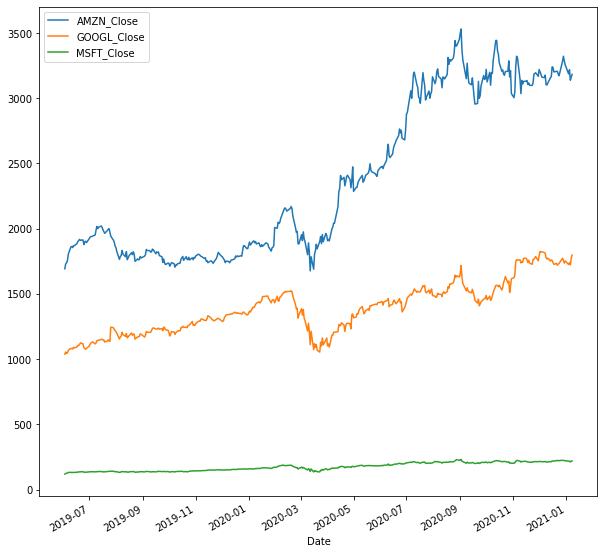

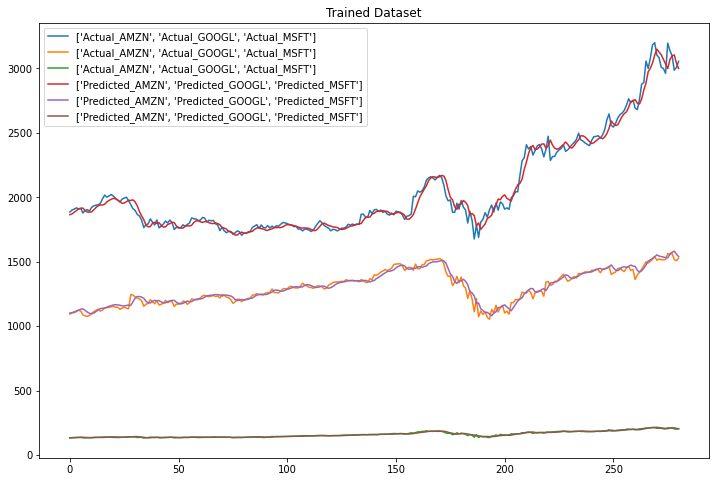

In [ ]:

!pip install yfinance

import yfinance as yf
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
 %matplotlib inline  
 


#stock data
amazon_data = yf.download('AMZN', start='2019-06-01', interval='1d',  end='2021-01-10', progress=False)[['Close']]
google_data = yf.download('GOOGL', start='2019-06-01', interval='1d',  end='2021-01-10', progress=False)[['Close']]
microsoft_data = yf.download('MSFT', start='2019-06-01', interval='1d',  end='2021-01-10', progress=False)[['Close']]

all_data = pd.merge(amazon_data, google_data, on='Date')
all_data = pd.merge(all_data, microsoft_data, on='Date')
all_data.head()

data_columns = ['AMZN_Close', 'GOOGL_Close', 'MSFT_Close']
all_data.columns = data_columns
  
all_data.plot(figsize=(10, 10))

train = all_data[0:int(len(all_data)*0.80)]

scl = MinMaxScaler()
#Scale the data
scl.fit(train.values.reshape(-1, 3))
train = scl.transform(train.values.reshape(-1, 3))

#Create a function to process the data into lb observations look back slices
# and create the train test dataset (90-10)
def processData(data, lb):
    X, Y = [], []
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb)])
        Y.append(data[(i+lb)])
    return np.array(X), np.array(Y)
 
 
lb = 10
X, y = processData(train, lb)
X_train, X_test = X[:int(X.shape[0]*0.90)], X[int(X.shape[0]*0.90):]
y_train, y_test = y[:int(y.shape[0]*0.90)], y[int(y.shape[0]*0.90):]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#Build the model
model = Sequential()
model.add(LSTM(256, input_shape=(lb, 3)))
model.add(Dense(3))
model.compile(optimizer='adam', loss='mse')

 
#Fit model with history to check for overfitting
history = model.fit(X_train, y_train, epochs=140, validation_data=(X_test, y_test), shuffle=False)
 
model.summary()

plt.figure(figsize=(12, 8))
 
Xt = model.predict(X_train)
plt.plot(scl.inverse_transform(y_train.reshape(-1, 3)), label=["Actual_AMZN", 'Actual_GOOGL', "Actual_MSFT"])
plt.plot(scl.inverse_transform(Xt), label=["Predicted_AMZN", 'Predicted_GOOGL', "Predicted_MSFT"])
plt.legend()
plt.title("Trained Dataset")
plt.show()